# Series de tiempo

- Una serie de datos de tiempo es una serie de puntos de datos u observaciones registradas en intervalos de tiempo diferentes o regulares. En general, una serie de tiempo es una secuencia de puntos de datos tomados en intervalos de tiempo igualmente espaciados. La frecuencia de los puntos de datos registrados puede ser horaria, diaria, semanal, mensual, trimestral o anual.
- La previsión de series temporales es el proceso de utilizar un modelo estadístico para predecir valores futuros de una serie temporal en función de resultados pasados.
- Un análisis de series temporales abarca métodos estadísticos para analizar datos de series temporales. Estos métodos nos permiten extraer estadísticas significativas, patrones y otras características de los datos. Las series de tiempo se visualizan con la ayuda de gráficos de líneas. Por lo tanto, el análisis de series de tiempo implica comprender los aspectos inherentes de los datos de la serie de tiempo para que podamos crear pronósticos significativos y precisos.



## Componentes de una serie de tiempo
- Tendencia: la tendencia muestra una dirección general de los datos de la serie temporal durante un largo período de tiempo. Una tendencia puede ser creciente (hacia arriba), decreciente (hacia abajo) u horizontal (estacionaria).
- Estacionalidad: el componente de estacionalidad exhibe una tendencia que se repite con respecto al momento, la dirección y la magnitud. 
- Componente cíclico: estas son las tendencias sin repetición establecida durante un período de tiempo particular. Un ciclo se refiere al período de altibajos, auges y depresiones de una serie de tiempo, que se observa principalmente en los ciclos económicos. Estos ciclos no exhiben una variación estacional pero generalmente ocurren durante un período de tiempo de 3 a 12 años dependiendo de la naturaleza de la serie de tiempo.
- Variación irregular: estas son las fluctuaciones en los datos de la serie temporal que se hacen evidentes cuando se eliminan las variaciones cíclicas y de tendencia. Estas variaciones son impredecibles, erráticas y pueden o no ser aleatorias.
- Descomposición ETS: la descomposición ETS se utiliza para separar diferentes componentes de una serie temporal. El término ETS significa error, tendencia y estacionalidad.

## Terminología
1. Dependencia- Se refiere a la asociación de dos observaciones de la misma variable en periodos de tiempo anteriores.

2. Estacionariedad- Muestra el valor medio de la serie que se mantiene constante a lo largo del periodo de tiempo. Si los efectos del pasado se acumulan y los valores aumentan hacia el infinito, entonces no se cumple la estacionariedad.

3. Diferenciación: la diferenciación se utiliza para hacer que la serie sea estacionaria y para controlar las autocorrelaciones. Puede haber algunos casos en los análisis de series de tiempo en los que no se requiera la diferenciación y las series sobrediferenciadas pueden producir estimaciones incorrectas.

4. Especificación: puede implicar la prueba de las relaciones lineales o no lineales de las variables dependientes mediante el uso de modelos de series temporales como los modelos ARIMA.

5. Suavizado exponencial: el suavizado exponencial en el análisis de series de tiempo predice el valor del próximo período en función del valor pasado y actual. Implica promediar los datos de manera que los componentes no sistemáticos de cada caso individual u observación se anulen entre sí. El método de suavizado exponencial se utiliza para predecir la predicción a corto plazo.

6. Ajuste de curvas: la regresión de ajuste de curvas en el análisis de series temporales se utiliza cuando los datos se encuentran en una relación no lineal.



In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv("AirPassengers.csv")
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [2]:
df.columns = ['Fecha','Número de pasajeros']

df.head()

,Fecha,Número de pasajeros
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


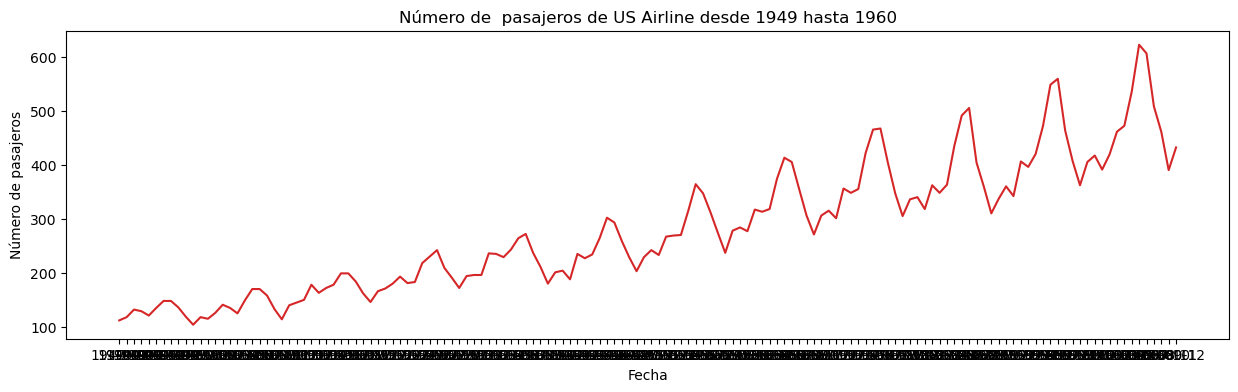

In [3]:
def plot_df(df, x, y, title="", xlabel='Fecha', ylabel='Número de pasajeros', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df['Fecha'], y=df['Número de pasajeros'], title='Número de  pasajeros de US Airline desde 1949 hasta 1960')

## Reconocimiento de patrones

1. Tendencia: Se observa una tendencia cuando se observa una pendiente creciente o decreciente en la serie de tiempo.
2. Estacionalidad: Se observa una estacionalidad cuando se observa un patrón repetido distinto entre intervalos regulares debido a factores estacionales. Podría ser por el mes del año, el día del mes, los días de semana o incluso la hora del día.
3. Ciclos o periodicidad: Otra cosa importante a considerar es el comportamiento cíclico. Ocurre cuando el patrón de subida y bajada de la serie no ocurre en intervalos fijos basados en el calendario. No debemos confundir efecto 'cíclico' con efecto 'estacional'. Si los patrones no son de frecuencias fijas basadas en el calendario, entonces es cíclico. Porque, a diferencia de la estacionalidad, los efectos cíclicos suelen estar influenciados por el negocio y otros factores socioeconómicos.

Sin embargo, no es obligatorio que todas las series temporales tengan tendencia y/o estacionalidad. Una serie de tiempo puede no tener una tendencia definida pero sí una estacionalidad y viceversa.

## Decomposition of a Time Series

La descomposición de una serie temporal se puede realizar considerando la serie como una combinación aditiva o multiplicativa del nivel base, la tendencia, el índice estacional y el término residual.
El método `season_decompose` en `statsmodels` implementa esto convenientemente.

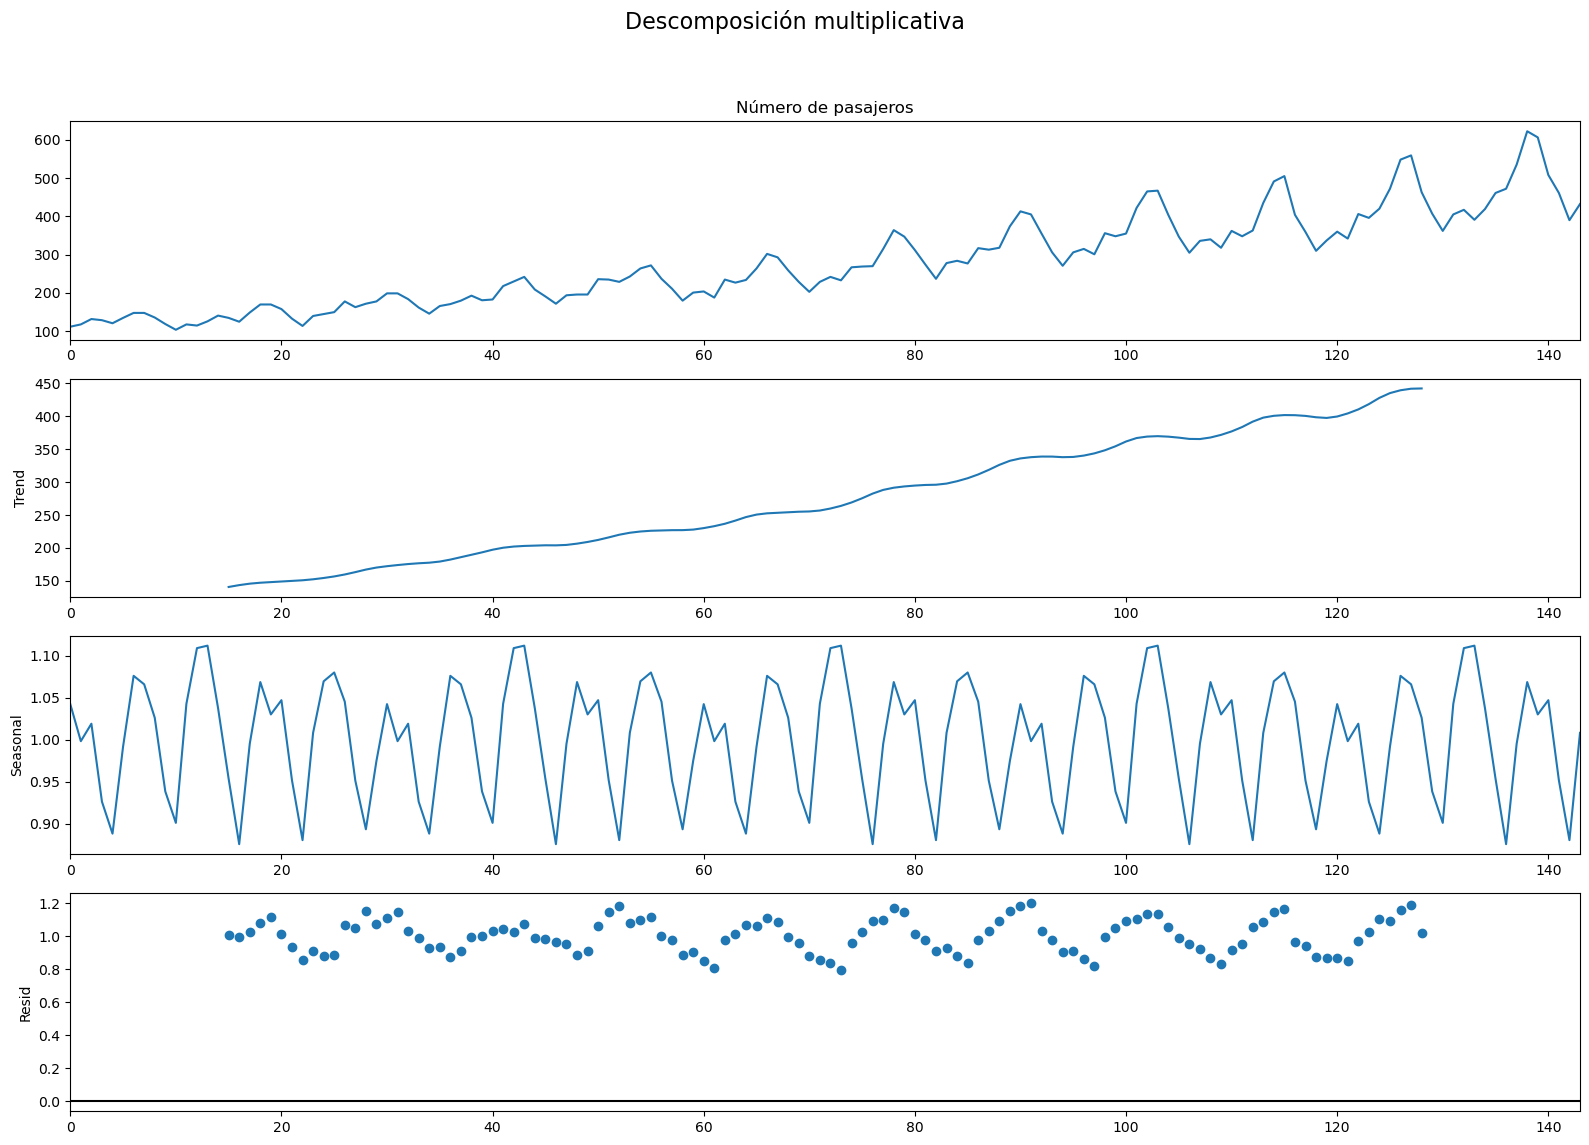

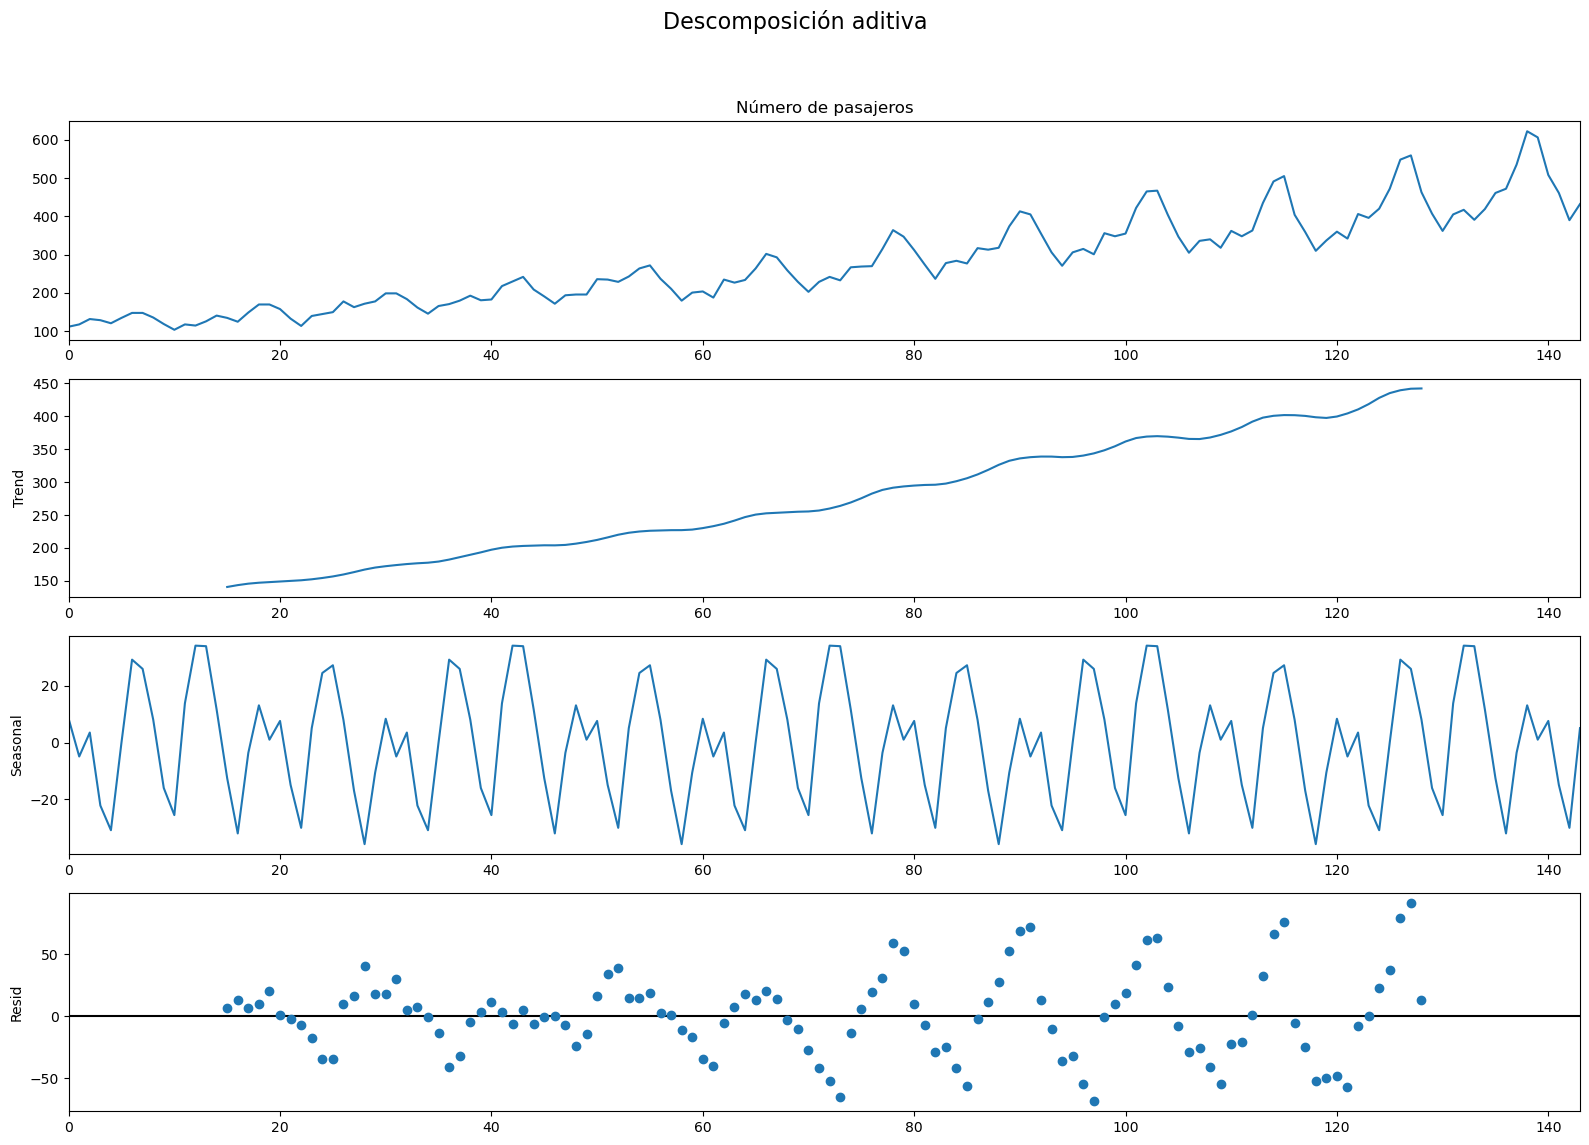

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Descomposición multiplicativa
multiplicative_decomposition = seasonal_decompose(df['Número de pasajeros'], model='multiplicative', period=30)

# Descomposición aditiva
additive_decomposition = seasonal_decompose(df['Número de pasajeros'], model='additive', period=30)

# Gráfic
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Descomposición multiplicativa', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Descomposición aditiva', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

## Estacionariedad

Una serie estacionaria es aquella en la que los valores de la serie no son una función del tiempo. Por lo tanto, los valores son independientes del tiempo.

Por lo tanto, las propiedades estadísticas de la serie, como la media, la varianza y la autocorrelación, son constantes en el tiempo. La autocorrelación de la serie no es más que la correlación de la serie con sus valores anteriores.

Una serie temporal estacionaria también es independiente de los efectos estacionales.
Ahora, trazaremos algunos ejemplos de series de tiempo estacionarias y no estacionarias para mayor claridad.

![Title](https://www.machinelearningplus.com/wp-content/uploads/2019/02/stationary-and-non-stationary-time-series-865x569.png?ezimgfmt=ng:webp/ngcb1)

Podemos convertir cualquier serie temporal no estacionaria en estacionaria aplicando una transformación adecuada. La mayoría de los métodos de pronóstico estadístico están diseñados para trabajar en una serie de tiempo estacionaria. El primer paso en el proceso de pronóstico suele ser hacer alguna transformación para convertir una serie no estacionaria en estacionaria.

## ¿Cómo hacer una serie estacionaria?

* Podemos aplicar algún tipo de transformación para hacer que la serie temporal sea estacionaria. Estas transformaciones pueden incluir:
- Diferenciando la Serie (una o más)
- Toma el registro de la serie.
- Saca la raíz enésima de la serie
- Combinación de lo anterior
El método más comúnmente usado y conveniente para estacionarizar la serie es diferenciar la serie al menos una vez hasta que se vuelva aproximadamente estacionaria.

Pronosticar una serie estacionaria es relativamente fácil y los pronósticos son más confiables.

**Una razón importante es que los modelos de pronóstico autorregresivos son esencialmente modelos de regresión lineal que utilizan los retrasos de la serie en sí como predictores.
Sabemos que la regresión lineal funciona mejor si los predictores (X variables) no están correlacionados entre sí. Por lo tanto, estacionarizar la serie resuelve este problema ya que elimina cualquier autocorrelación persistente, lo que hace que los predictores (retrasos de la serie) en los modelos de pronóstico sean casi independientes.**